##   -Deep Learning -  Deepti Kulkarni 

##

-  Build a DNN model for Online Shoppers Purchasing Intention Dataset to check Revenue output - Binary classification problem 
-  Understand basic DNN model building process using Keras
-  Analyze model performance and capacity vs generalization tradeoff
-  Modify models to reduce overfitting and improve performance
-  Analyze results and explore improvements to model

## Step 1: Import Libraries

In [0]:
#Importing all necessory librariies

from numpy.random import seed
seed(2)
from tensorflow import set_random_seed
set_random_seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
print(tf.__version__)

1.14.0-rc1




##Step 2: Import Data

In [0]:
#import data from source

tf.logging.set_verbosity(tf.logging.ERROR)
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:.1f}'.format

concrete_dataframe = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00468/online_shoppers_intention.csv", sep=",")
concrete_dataframe = concrete_dataframe.reindex(np.random.permutation(concrete_dataframe.index))

In [0]:
#printing head and shape of dataframe 

print(concrete_dataframe.shape[0])
print(concrete_dataframe.head())


12330
      Administrative  Administrative_Duration  ...  Weekend  Revenue
3566               0                      0.0  ...     True    False
50                 0                      0.0  ...     True    False
5378               0                      0.0  ...    False    False
174                5                     41.3  ...     True    False
9061               2                     19.0  ...    False    False

[5 rows x 18 columns]


##Step 3: Preprocess

In [0]:
#There are some categorical variables available in the dataset, therefore we will have to divide dataframe into two different dataframe to perform normalisation operation

#Diving categorical columns and adding in dataframe called concrete_categorical 
categorical_col = ["Month",
     "OperatingSystems",
     "Browser",
     "Region",
     "TrafficType",
     "VisitorType",
     "Weekend"]
concrete_categorical = concrete_dataframe[categorical_col]

#Diving continuous columns and adding in dataframe called concrete_continuous 

continuous_col = ["Administrative",
     "Administrative_Duration",
     "Informational",
     "Informational_Duration",
     "ProductRelated",
     "ProductRelated_Duration",
     "BounceRates",
     "ExitRates", 
     "PageValues",
     "SpecialDay"]
concrete_continuous = concrete_dataframe[continuous_col]

#Diving target variable and adding in dataframe called concrete_target
concrete_target = concrete_dataframe["Revenue"]
 

In [0]:
#converting categorical variables into dummies using one hot enconding 

oh_concrete_categorical = pd.get_dummies(concrete_categorical,columns=categorical_col, drop_first=False)
oh_concrete_target = pd.get_dummies(concrete_target,columns=["Revenue"], drop_first=True)


In [0]:
oh_concrete_categorical

,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
3566,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
50,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5378,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
174,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9061,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
11798,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6637,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2575,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [0]:
oh_concrete_target

,True
3566,0
50,0
5378,0
174,0
9061,0
...,...
2514,0
11798,1
6637,0
2575,0


In [0]:
# Choose the first 8631 examples for training.

training_continuous = concrete_continuous.head(8631)
training_categorical = oh_concrete_categorical.head(8631)
training_target = oh_concrete_target.head(8631)

# Choose the last 3699 examples for validation.

validation_continuous = concrete_continuous.tail(3699)
validation_categorical = oh_concrete_categorical.tail(3699)
validation_target = oh_concrete_target.tail(3699)

In [0]:
#Standardize features by removing the mean and scaling to unit variance for training and validation dataframes (for continuous variables only)

scaler = StandardScaler().fit(training_continuous.values)

scaledf = scaler.transform(training_continuous.values) #training dataset
scaled_training_continuous = pd.DataFrame(scaledf, index=training_continuous.index, columns=training_continuous.columns)


vscaled = scaler.transform(validation_continuous.values) #validation dataset
scaled_validation_continuous = pd.DataFrame(vscaled, index=validation_continuous.index, columns=validation_continuous.columns)

# Double-check that we've done the right thing.
print("Training examples summary:")
display.display(scaled_training_continuous.describe())
print("Validation examples summary:")
display.display(scaled_validation_continuous.describe())

print("Training targets summary:")
display.display(training_target.describe())
print("Validation targets summary:")
display.display(validation_target.describe())


Training examples summary:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0,8631.0
mean,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0
std,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
min,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,-0.5,-0.9,-0.3,-0.3
25%,-0.7,-0.4,-0.4,-0.2,-0.5,-0.5,-0.5,-0.6,-0.3,-0.3
50%,-0.4,-0.4,-0.4,-0.2,-0.3,-0.3,-0.4,-0.4,-0.3,-0.3
75%,0.5,0.1,-0.4,-0.2,0.1,0.1,-0.1,0.1,-0.3,-0.3
max,7.5,18.6,18.2,17.8,14.9,31.6,3.6,3.2,16.3,4.8


Validation examples summary:


,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay
count,3699.0,3699.0,3699.0,3699.0,3699.0,3699.0,3699.0,3699.0,3699.0,3699.0
mean,0.0,0.0,-0.0,0.0,0.0,-0.0,-0.0,-0.0,0.1,0.0
std,1.0,1.0,0.9,1.0,1.0,0.9,1.0,1.0,1.2,1.1
min,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,-0.5,-0.9,-0.3,-0.3
25%,-0.7,-0.4,-0.4,-0.2,-0.5,-0.5,-0.5,-0.6,-0.3,-0.3
50%,-0.4,-0.4,-0.4,-0.2,-0.3,-0.3,-0.4,-0.4,-0.3,-0.3
75%,0.5,0.1,-0.4,-0.2,0.1,0.2,-0.1,0.1,-0.3,-0.3
max,7.2,11.2,8.9,12.7,14.5,11.1,3.6,3.2,20.6,4.8


Training targets summary:


,True
count,8631.0
mean,0.1
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


Validation targets summary:


,True
count,3699.0
mean,0.2
std,0.4
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,1.0


In [0]:

#Combining dataframe for categorical and continuous variables 

training_combined = pd.concat([scaled_training_continuous, training_categorical],axis=1)
validation_combined =  pd.concat([scaled_validation_continuous, validation_categorical], axis=1)

In [0]:
training_combined

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
3566,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,3.6,3.2,-0.3,-0.3,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
50,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,3.6,3.2,-0.3,-0.3,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
5378,-0.7,-0.4,-0.4,-0.2,-0.6,-0.6,3.6,3.2,-0.3,-0.3,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
174,0.8,-0.2,-0.4,-0.2,-0.2,-0.4,-0.5,-0.7,-0.3,4.8,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1
9061,-0.1,-0.3,-0.4,-0.2,-0.5,-0.3,-0.5,-0.6,-0.3,-0.3,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5713,-0.1,-0.0,-0.4,-0.2,-0.0,-0.3,-0.5,-0.5,-0.3,-0.3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6435,1.4,0.2,-0.4,-0.2,-0.3,-0.2,-0.3,-0.5,1.7,-0.3,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
724,-0.7,-0.4,-0.4,-0.2,-0.7,-0.6,3.6,3.2,-0.3,-0.3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
350,-0.1,-0.1,-0.4,-0.2,-0.4,-0.3,-0.5,-0.8,-0.3,-0.3,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0


In [0]:
validation_combined

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month_Aug,Month_Dec,Month_Feb,Month_Jul,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep,OperatingSystems_1,OperatingSystems_2,OperatingSystems_3,OperatingSystems_4,OperatingSystems_5,OperatingSystems_6,OperatingSystems_7,OperatingSystems_8,Browser_1,Browser_2,Browser_3,Browser_4,Browser_5,Browser_6,Browser_7,Browser_8,Browser_9,Browser_10,Browser_11,Browser_12,Browser_13,Region_1,Region_2,Region_3,Region_4,Region_5,Region_6,Region_7,Region_8,Region_9,TrafficType_1,TrafficType_2,TrafficType_3,TrafficType_4,TrafficType_5,TrafficType_6,TrafficType_7,TrafficType_8,TrafficType_9,TrafficType_10,TrafficType_11,TrafficType_12,TrafficType_13,TrafficType_14,TrafficType_15,TrafficType_16,TrafficType_17,TrafficType_18,TrafficType_19,TrafficType_20,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_False,Weekend_True
4729,-0.7,-0.4,-0.4,-0.2,-0.6,-0.4,-0.2,1.0,-0.3,-0.3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9827,-0.7,-0.4,-0.4,-0.2,-0.2,0.2,0.2,-0.2,-0.3,-0.3,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6750,-0.1,-0.3,-0.4,-0.2,0.3,0.1,-0.3,-0.2,-0.3,-0.3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
9114,0.5,0.9,-0.4,-0.2,-0.2,0.2,-0.5,-0.7,3.2,-0.3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
8663,-0.7,-0.4,-0.4,-0.2,0.1,0.0,-0.4,-0.7,1.7,-0.3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2514,-0.1,-0.2,-0.4,-0.2,-0.2,0.2,-0.3,-0.8,-0.3,-0.3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
11798,-0.7,-0.4,-0.4,-0.2,-0.6,-0.6,-0.5,0.5,-0.3,-0.3,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
6637,-0.7,-0.4,-0.4,-0.2,-0.1,-0.3,0.1,0.1,-0.3,-0.3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
2575,-0.4,-0.4,-0.4,-0.2,-0.4,-0.5,-0.5,-0.8,-0.3,-0.3,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0


In [0]:
#checking if we have similar shape for both dataframes after combining categorical and continuous dataframes 

print (validation_combined.shape[1])
print(training_combined.shape[1])

75
75


##Step 4: 1. Baseline model for online_shoppers_intention dataset

In [0]:
#Checking accuracy of the baseline model 

#Baseline model- 84.52 for false 

baseline_model = validation_target[validation_target.columns[0]].value_counts()[0]/validation_target[validation_target.columns[0]].count()
print("Accuracy for Baseline Model: ",baseline_model*100,"%")


Accuracy for Baseline Model:  82.83319816166531 %


##Step 4: 2. Build First Model for online_shoppers_intention dataset

In [0]:
#Building first model for binary classification 

first_model = keras.Sequential([
    keras.layers.Dense(32,activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
    keras.layers.Dense(1, activation= "sigmoid")  # For Binary classification using activation= "sigmoid"
  ])

optimizer = tf.train.RMSPropOptimizer(0.001)  # Algorithm for minimising the error
#optimizer = tf.train.AdamOptimizer()

first_model.compile(loss='binary_crossentropy', # Calculating Binary cross entropy because this is binary classfication 
                optimizer=optimizer,
                metrics=['accuracy'])  #Accuracy

# no. of neurons in hidden layer=input+output/2 or 2/3 Input +output or 2 times input
# relu has to do with optimisation, easier to compute gradients


##Step 4: 3. Build L1 Model for online_shoppers_intention dataset

In [0]:

#Building model l1 for binary classification 

l1_model = keras.Sequential([
    keras.layers.Dense(60, activation=tf.nn.relu,
                       #kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       #kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(60, activation=tf.nn.relu,
                       #kernel_regularizer=keras.regularizers.l2(0.1),
                       input_shape=(training_combined.shape[1],)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(32,activation=tf.nn.relu,
                       #kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(16,activation=tf.nn.relu,
                       #kernel_regularizer=keras.regularizers.l2(0.1),
                      ),
    keras.layers.Dense(1, activation= "sigmoid")
  ])

l1_model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])

##Step 4: 3. Build L2 Model for online_shoppers_intention dataset

In [0]:
#Building model l2 for binary classification 

l2_model = keras.Sequential([
    keras.layers.Dense(70, activation=tf.nn.relu,
                       input_shape=(training_combined.shape[1],)),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(70, activation=tf.nn.relu),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(70, activation=tf.nn.relu),
    #keras.layers.Dropout(0.25),
    keras.layers.Dense(10, activation=tf.nn.relu),
    keras.layers.Dense(1, activation= "sigmoid")
  ])

l2_model.compile(loss='binary_crossentropy',
                optimizer=optimizer,
                metrics=['accuracy'])


##Step 5: Fit Model (First model, L1 model and L2 model)

---



In [0]:

# Fitting model which we built in the previous section 

class PrintDot(keras.callbacks.Callback): # prints dot at the end of every epoch
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 50  # number of times the model runs 
tf.set_random_seed(1)

# Store training stats
f1_history = first_model.fit(training_combined, training_target, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_target), verbose=0,
                    callbacks=[PrintDot()])

l1_history = l1_model.fit(training_combined, training_target, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_target), verbose=0,
                    callbacks=[PrintDot()])

l2_history = l2_model.fit(training_combined, training_target, epochs=EPOCHS,
                    validation_data= (validation_combined, validation_target), verbose=0,
                    callbacks=[PrintDot()])


..................................................
..................................................
..................................................

##Step 6: Model Evaluation

In [0]:
# Model evaluation for validation data for checking accuracy of our models 

scores=first_model.evaluate(validation_combined, validation_target)
print("\nAccuracy for first model: %s: %.2f%%  " % (first_model.metrics_names[1], scores[1]*100))

scores=l1_model.evaluate(validation_combined, validation_target)
print("\nAccuracy for L1 model: %s: %.2f%% " % (l1_model.metrics_names[1], scores[1]*100))

scores=l2_model.evaluate(validation_combined, validation_target)
print("\nAccuracy for L2 model: %s: %.2f%% " % (l2_model.metrics_names[1], scores[1]*100))

3699/3699 [==============================] - 0s 37us/sample - loss: 0.2788 - acc: 0.8916

Accuracy for first model: acc: 89.16%  
3699/3699 [==============================] - 0s 40us/sample - loss: 0.7178 - acc: 0.8494

Accuracy for L1 model: acc: 84.94% 
3699/3699 [==============================] - 0s 42us/sample - loss: 0.8091 - acc: 0.8597

Accuracy for L2 model: acc: 85.97% 


In [0]:
print(l1_history.history.keys()) # checking keys for l1 model to check key

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


##Step 7: Plot Results
### 1. Graph for accuracy of all models

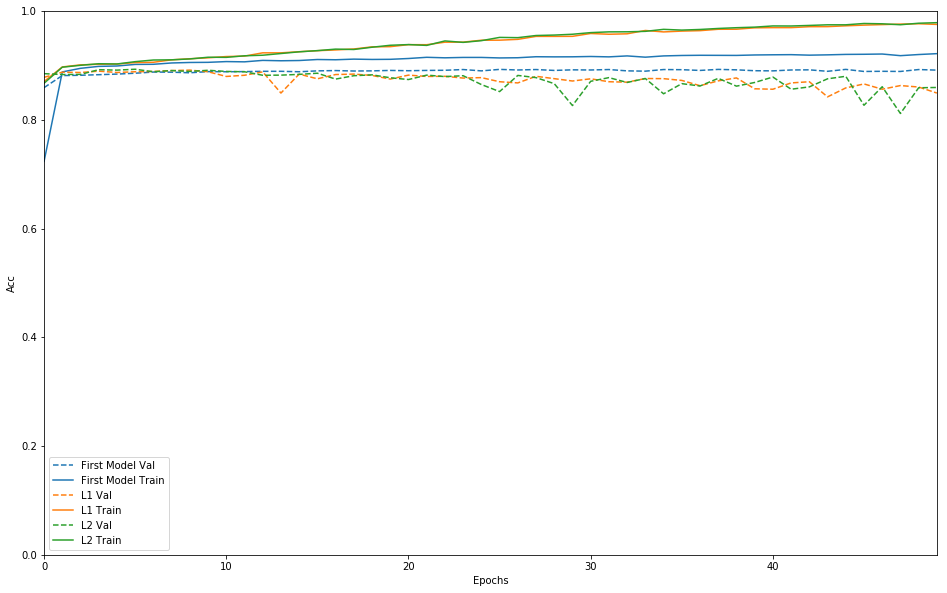

In [0]:
import matplotlib.pyplot as plt


def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

# Plot history Multiple
plot_history([('First Model', f1_history),
              ('L1', l1_history),
              ('L2', l2_history),])

###2. Graph for loss of first model

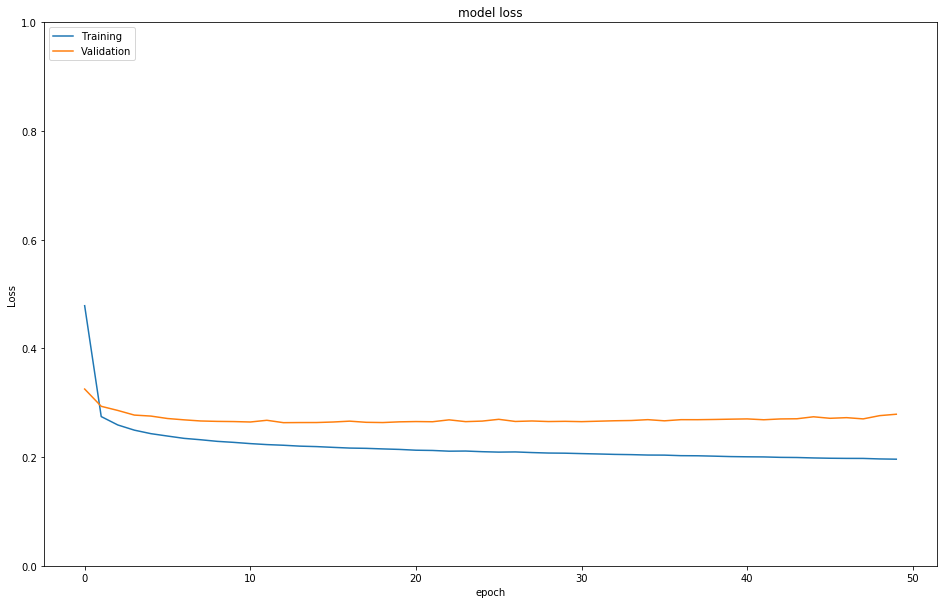

In [0]:
# Plotting graph of first model for loss

plt.figure(figsize=(16,10))
plt.plot(f1_history.history['loss'])
plt.plot(f1_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.ylim([0,1])

plt.legend(['Training', 'Validation'], loc='upper left')
plt.show()

###3. Plotting graph for weights

<BarContainer object of 32 artists>

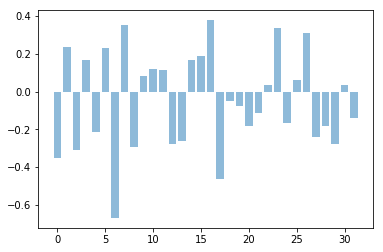

In [0]:
# Plot Weights for first model

nfw = first_model.get_weights()[0][0]
y_pos = np.arange(len(nfw))
 
plt.bar(y_pos, nfw, align='center', alpha=0.5)

##Step 8: Predictions

In [0]:
#Printing prediction values for target variable using first model 

valpreds = first_model.predict_on_batch(validation_combined)
print(valpreds)

[[0.00495508]
 [0.06796649]
 [0.02318266]
 ...
 [0.00231248]
 [0.44170952]
 [0.21424827]]


In [0]:
#with pd.option_context('display.max_rows', None, 'display.max_columns', None):
  print(validation_target)

       True
4729      0
9827      1
6750      0
9114      1
8663      1
...     ...
2514      0
11798     1
6637      0
2575      0
7336      0

[3699 rows x 1 columns]


## Analysis of all models (Model Comparison for Question 1)

- From above models, we can see that, we are getting accuracy of 82.83% with baseline model. But after building and fitting all DNN models we are getting accuracy more than baseline model for all models (first_model, l1_model, l2_model).

- Best model is : first_model with accuracy : 89.16% is best model and as we can see from graph of loss for first_model loss is low between validation and training data. 

- Hence, when we compare Baseline model with DNN models, we can conclude that we are getting better predictions and accuracy with DNN model. 